In [2]:
##Estimación de datos de finanzas públicas
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign,httr,jsonlite)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpuSXLwv\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpuSXLwv\remotes26d8442f6d26\cpyp-ipdp-funcionespgd-3fffa52/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [3]:
mortmen <- openxlsx::read.xlsx("indica_salud.xlsx", sheet = "mort_menores_5")  %>%
rename(year=periodo)%>%
intervals("deseable", margen = 0.04, año_base = 2023)%>%
#Utilizar la tasa de crecimiento de 2045 y 2023 para modificar los valores de 2023 a 2045 del superior
  { 
    sup_2023 <- .$superior[.$year == 2023]
    sup_2045 <- .$superior[.$year == 2045]
    delta <- (sup_2045 - sup_2023) / (2045 - 2023)

    mutate(., superior = ifelse(year >= 2023 & year <= 2045,
                                sup_2023 + delta * (year - 2023),
                                superior))
  }
    
mortmen

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,18.100000,18.10000,18.100000
2,2011,16.400000,16.40000,16.400000
3,2012,15.300000,15.30000,15.300000
4,2013,14.900000,14.90000,14.900000
5,2014,13.500000,13.50000,13.500000
6,2015,14.200000,14.20000,14.200000
7,2016,13.700000,13.70000,13.700000
8,2017,14.400000,14.40000,14.400000
9,2018,14.000000,14.00000,14.000000


In [4]:
margen_superior <- 0.04

# 1. Leer y calcular los intervalos con margen original
mortmen <- openxlsx::read.xlsx("indica_salud.xlsx", sheet = "mort_menores_5") %>%
  rename(year = periodo) %>%
  intervals("deseable", margen = margen_superior, año_base = 2023) %>%
  {
    sup_2023 <- .$superior[.$year == 2023]
    sup_2045 <- .$superior[.$year == 2045]
    delta <- (sup_2045 - sup_2023) / (2045 - 2023)
    
    mutate(.,
           superior = ifelse(year >= 2023 & year <= 2045,
                             sup_2023 + delta * (year - 2023),
                             superior))
  }

# 2. Recalcular inferior con otro margen usando intervals()
#    pero conservar el superior actual
margen_inferior <- 0.01

mortmen <- mortmen %>%
  select(-inferior) %>%  # eliminar inferior previo
  intervals("estimado", margen = margen_inferior, año_base = 2023) %>%
  mutate(superior = mortmen$superior)  # restaurar el superior ajustado
mortmen

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,18.100000,18.10000,18.100000
2,2011,16.400000,16.40000,16.400000
3,2012,15.300000,15.30000,15.300000
4,2013,14.900000,14.90000,14.900000
5,2014,13.500000,13.50000,13.500000
6,2015,14.200000,14.20000,14.200000
7,2016,13.700000,13.70000,13.700000
8,2017,14.400000,14.40000,14.400000
9,2018,14.000000,14.00000,14.000000


In [5]:
margen_superior <- 0.06

mortcardio <- openxlsx::read.xlsx("indica_salud.xlsx", sheet = "mortalidad_cardio_1")  %>%
rename(year=periodo)%>%
  intervals("deseable", margen = margen_superior, año_base = 2023) %>%
  {
    sup_2023 <- .$superior[.$year == 2023]
    sup_2045 <- .$superior[.$year == 2045]
    delta <- (sup_2045 - sup_2023) / (2045 - 2023)
    
    mutate(.,
           superior = ifelse(year >= 2023 & year <= 2045,
                             sup_2023 + delta * (year - 2023),
                             superior))
  }

# 2. Recalcular inferior con otro margen usando intervals()
#    pero conservar el superior actual
margen_inferior <- 0.01

mortcardio <- mortcardio %>%
  select(-inferior) %>%  # eliminar inferior previo
  intervals("estimado", margen = margen_inferior, año_base = 2023) %>%
  mutate(superior = mortcardio$superior)  # restaurar el superior ajustado
  
mortcardio

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,130.49255,130.4926,130.49255
2,2011,129.44089,129.4409,129.44089
3,2012,137.67349,137.6735,137.67349
4,2013,137.61362,137.6136,137.61362
5,2014,147.44120,147.4412,147.44120
6,2015,153.25368,153.2537,153.25368
7,2016,166.16448,166.1645,166.16448
8,2017,164.18753,164.1875,164.18753
9,2018,170.95766,170.9577,170.95766


In [6]:
nac_menores_15 <- openxlsx::read.xlsx("indica_salud.xlsx", sheet = "nac_menores_15")  %>%
rename(year=periodo)%>%
intervals("deseable", margen = 0.04, año_base = 2023)
nac_menores_15

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2018,394,394.00000,394.00000
2,2019,322,322.00000,322.00000
3,2020,272,272.00000,272.00000
4,2021,321,321.00000,321.00000
5,2022,304,304.00000,304.00000
6,2023,299,299.00000,299.00000
7,2024,256,266.24000,246.15385
8,2025,214,231.46240,197.85503
9,2026,171,192.35174,152.01838


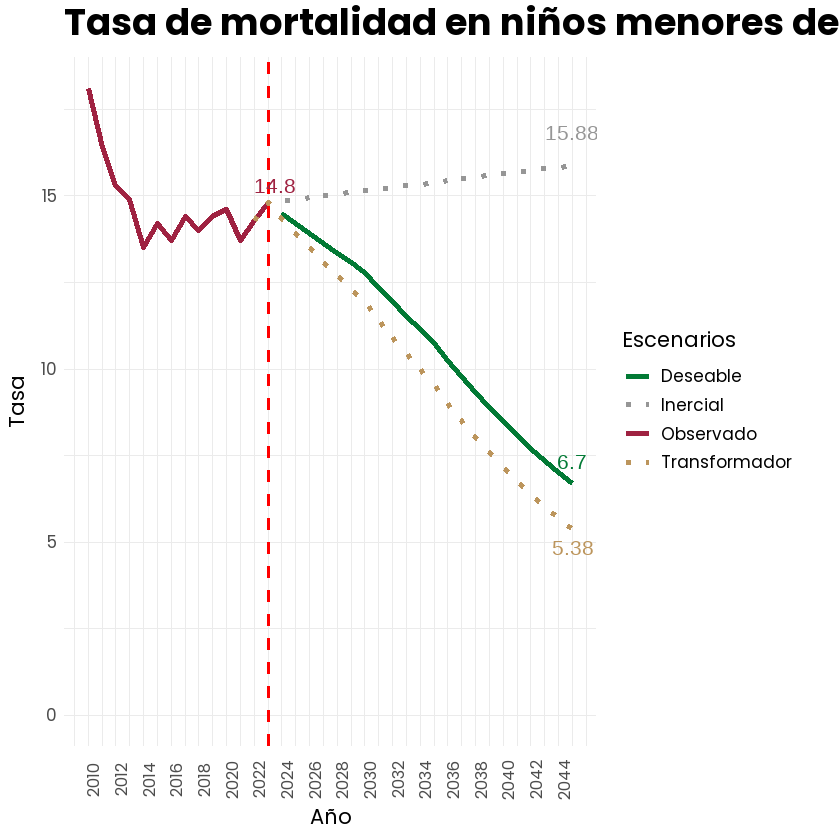

In [7]:
grafica_bonita(
  data = mortmen,
  x = "year",
  y = "estimado",
  titulo = "Tasa de mortalidad en niños menores de 5 años",
        ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.5, 0.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Tasa",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)


ggsave("H:/Mi unidad/pgd/graficas/mortalidad_menores_estimada.png", width = 10, height = 6, dpi = 185, bg = "white")

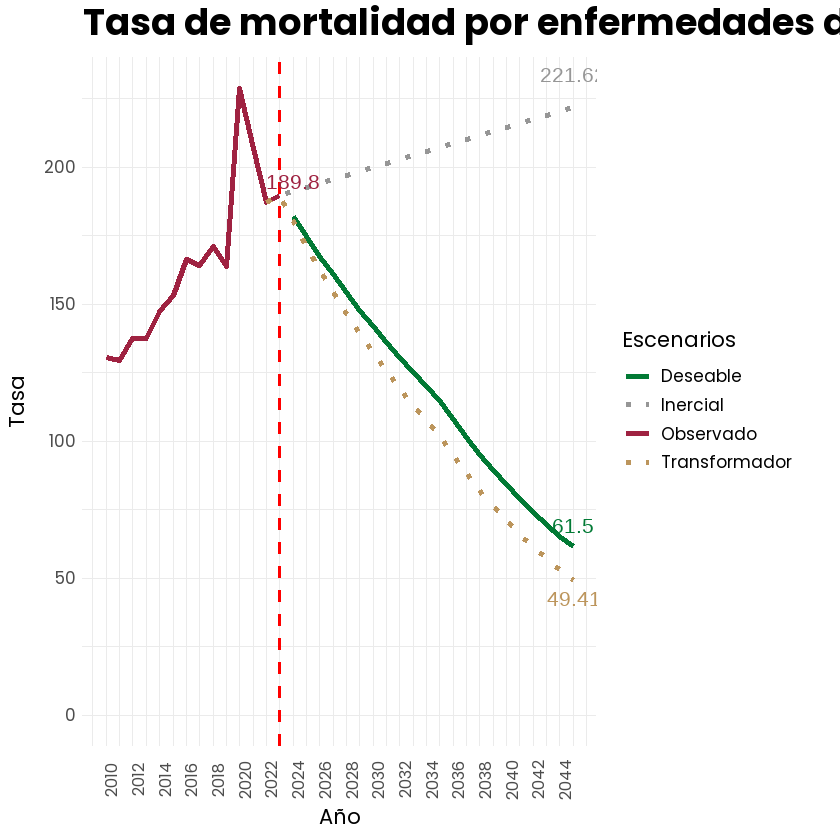

In [8]:
grafica_bonita(
  data = mortcardio,
  x = "year",
  y = "estimado",
  titulo = "Tasa de mortalidad por enfermedades de corazón",
        ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Tasa",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/mortalidad_corazon_estimada.png", width = 10, height = 6, dpi = 185, bg = "white")

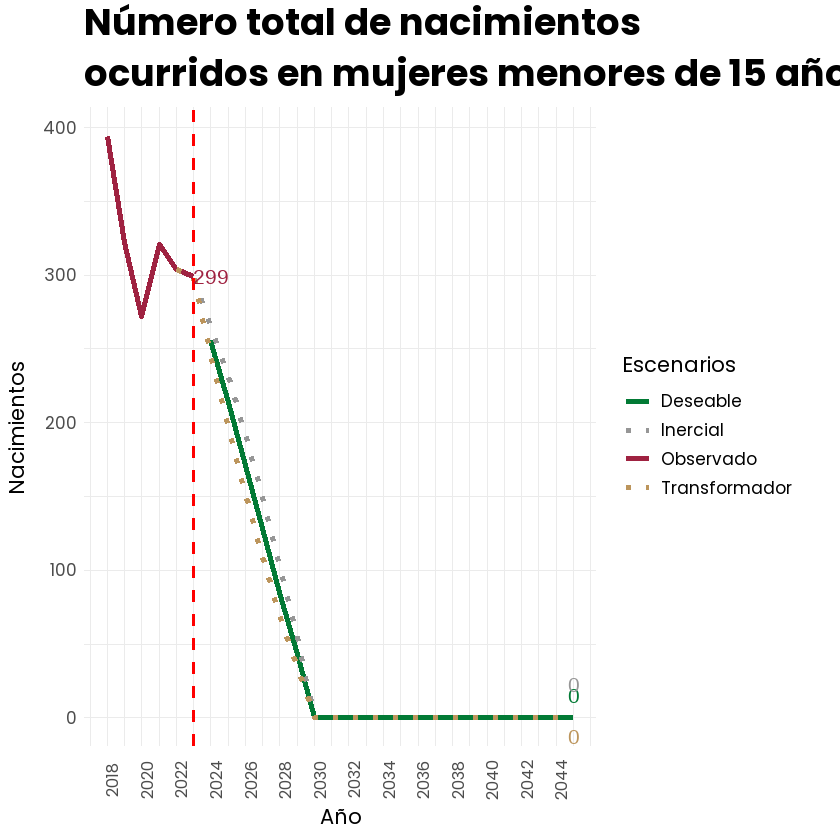

In [9]:
grafica_bonita(
  data = nac_menores_15,
  x = "year",
  y = "estimado",
  titulo = "Número total de nacimientos 
ocurridos en mujeres menores de 15 años",
        ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 0.2),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Nacimientos",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/nac_menor_15_estimada.png", width = 10, height = 6, dpi = 185, bg = "white")